In [2]:
# import package
import pandas as pd

In [3]:
# read CSV file
df = pd.read_csv("./data.csv")

In [4]:
df

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,are_there_children_0_to_2_yrs_out_of_educational_system,...,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
0,4570534489882624,2021-03-17,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,...,0,0,0,1,1,0,0,0,0,0
1,6440166989496320,2021-03-29,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,0,...,1,0,1,0,1,1,0,0,0,0
2,5001167808757760,2021-03-18,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,...,1,1,1,0,1,0,1,0,0,1
3,5524933164924928,2021-03-24,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,0,...,1,1,1,0,1,0,0,0,0,0
4,5032515751641088,2021-03-18,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,...,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,5229259428986880,2021-03-22,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Anzoátegui,0,...,1,1,1,1,1,0,0,1,0,1
4432,6520660045332480,2021-03-19,Female,Over 45 years old,Rural,"I can afford food, but nothing else",Primary school completed,"I work part-time, either as an employee or sel...",Anzoátegui,0,...,0,0,1,0,0,1,0,1,0,0
4433,5222701550796800,2021-03-25,Male,16 to 25 years old,Suburban/Peri-urban,"I can afford food, regular expenses, and cloth...",Technical school diploma or degree completed,I am a student and I work part-time,Anzoátegui,1,...,1,0,1,1,1,1,0,1,1,1
4434,6150639704080384,2021-03-13,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,"I work full-time, either as an employee or sel...",Anzoátegui,1,...,0,0,1,0,1,1,0,1,0,0


In [5]:
print(df.shape)
print(df.dtypes)

(4436, 27)
submission_id                                                              int64
submission_date                                                           object
gender                                                                    object
age                                                                       object
geography                                                                 object
financial_situation                                                       object
education                                                                 object
employment_status                                                         object
submission_state                                                          object
are_there_children_0_to_2_yrs_out_of_educational_system                    int64
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school            int64
are_there_children_who_stopped_enrolling_in_primary_education              int64
are_there_childre

Visulization

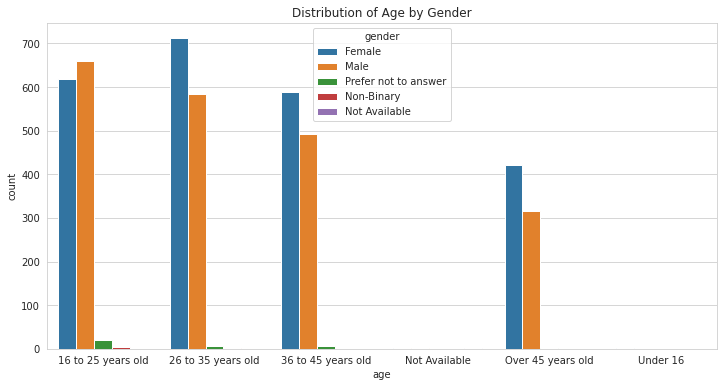

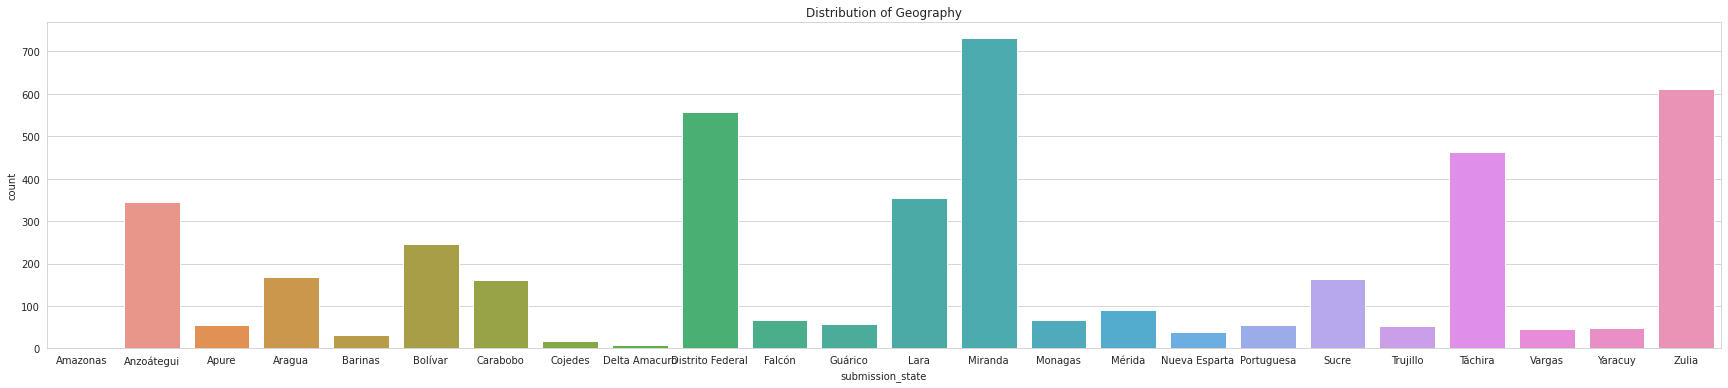

In [6]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age', hue='gender', order=sorted(df['age'].unique()))
plt.title('Distribution of Age by Gender')
plt.show()

plt.figure(figsize=(30, 6))
sns.countplot(data=df, x='submission_state', order=sorted(df['submission_state'].unique()))
plt.title('Distribution of Geography')
plt.show()

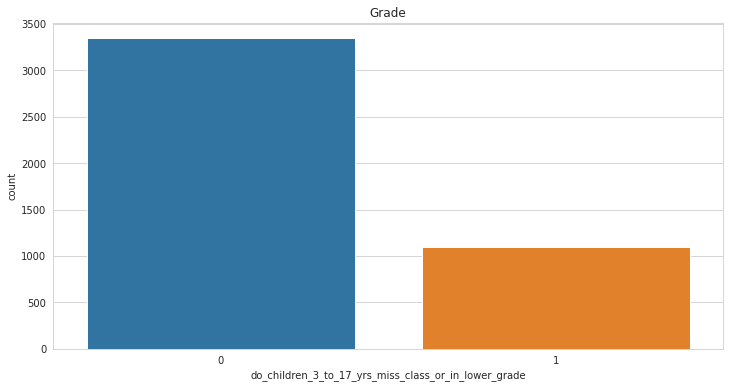

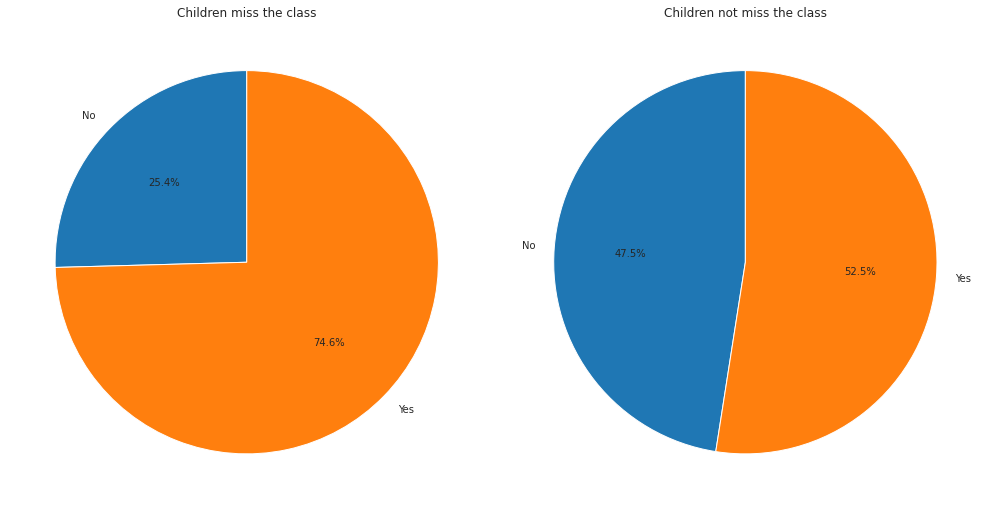

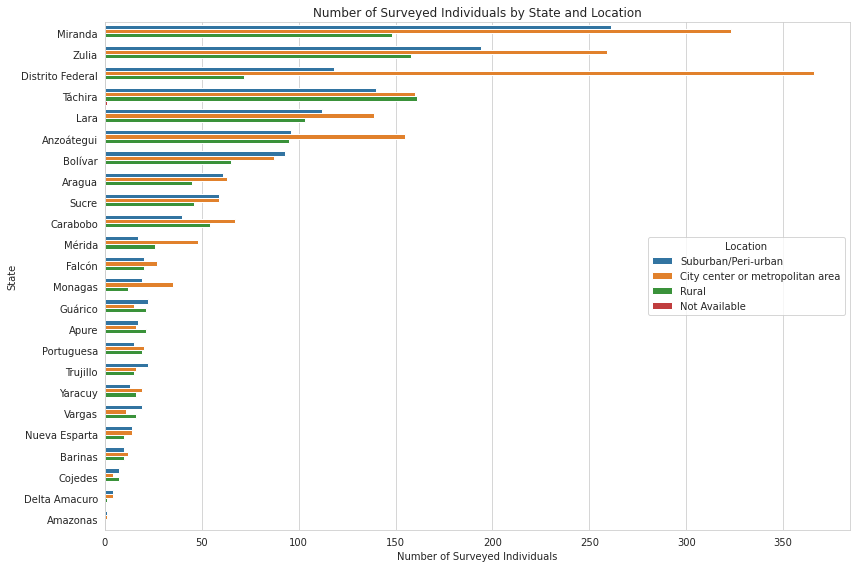

In [7]:
# Data Exploration
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='do_children_3_to_17_yrs_miss_class_or_in_lower_grade')
plt.title('Grade')
plt.show()

df['col1'] = df['do_children_3_to_17_yrs_miss_class_or_in_lower_grade'].map({1: 'Yes', 0: 'No'})
df['col2'] = df['does_home_shows_severe_deficit_of_internet'].map({1: 'Yes', 0: 'No'})
cross_counts = df.groupby('col1')['col2'].value_counts().unstack()
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].pie(cross_counts.loc['Yes'], labels=cross_counts.columns, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Children miss the class')
axes[1].pie(cross_counts.loc['No'], labels=cross_counts.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Children not miss the class')
plt.tight_layout()
df.drop('col1', axis=1, inplace=True)
df.drop('col2', axis=1, inplace=True)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='submission_state', hue='geography', order=df['submission_state'].value_counts().index)
plt.title('Number of Surveyed Individuals by State and Location')
plt.xlabel('Number of Surveyed Individuals')
plt.ylabel('State')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

Verify the data quality 

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

submission_id                                                             0
submission_date                                                           0
gender                                                                    0
age                                                                       0
geography                                                                 0
financial_situation                                                       0
education                                                                 0
employment_status                                                         0
submission_state                                                          0
are_there_children_0_to_2_yrs_out_of_educational_system                   0
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school           0
are_there_children_who_stopped_enrolling_in_primary_education             0
are_there_children_who_stopped_enrolling_in_secondary_education           0
are_children

In [9]:
# check same value
print(df.duplicated().sum())

0


In [10]:
# check NA
print(df[df == 'Not Available'].count()) 

submission_id                                                             0
submission_date                                                           0
gender                                                                    1
age                                                                       3
geography                                                                 1
financial_situation                                                       1
education                                                                 0
employment_status                                                         1
submission_state                                                          0
are_there_children_0_to_2_yrs_out_of_educational_system                   0
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school           0
are_there_children_who_stopped_enrolling_in_primary_education             0
are_there_children_who_stopped_enrolling_in_secondary_education           0
are_children

Data Preparation

In [11]:
# column selection
df.drop('submission_date', axis=1, inplace=True)
# row selection
teenagers_not_attending = df[df['were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school'] == 1]

In [12]:
df_cleaned = df[~df.applymap(lambda x: x == 'Not Available').any(axis=1)]
df_cleaned = df_cleaned[df_cleaned['age'] != 'Under 16']

In [13]:
education_mapping = {'No formal education': 1, 'Prefer not to answer': 1, 'Some primary education': 2, 'Primary school completed': 3, 'Some secondary school / high school': 4, 'Secondary/high school': 4, 'Secondary school/ high school completed': 5, 'Some technical education (e.g polytechnic school)': 6, 'Technical school': 6, 'Technical school diploma or degree completed': 7, 'Some university or college': 8, 'College or university': 8, 'University or college degree completed': 9, 'Post-graduate education': 10, 'Post graduate': 10}
df_cleaned['education'] = df_cleaned['education'].map(education_mapping)

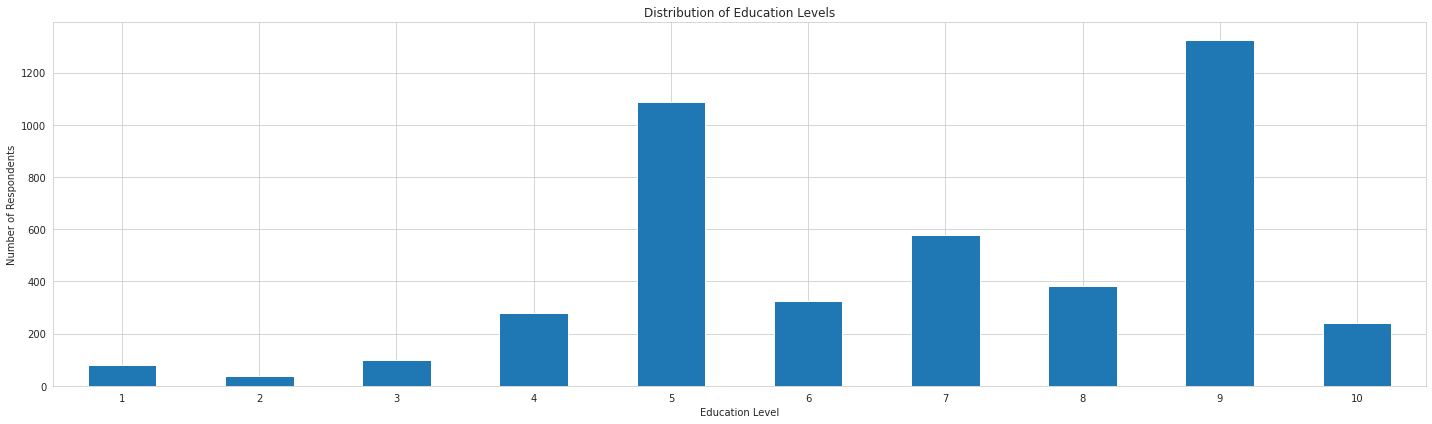

In [14]:
education_counts = df_cleaned['education'].value_counts().sort_index()
education_counts.plot(kind='bar', figsize=(20,6))
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Data Integration

In [15]:
df2 = pd.read_csv("./data2.csv")

In [16]:
merged_df = pd.merge(df_cleaned, df2, left_on='submission_state', right_on='states', how='left')
merged_df.fillna(merged_df.mean(), inplace=True)
merged_df.drop(columns=['states'], inplace=True)

/tmp/ipykernel_4129/3736221804.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df.fillna(merged_df.mean(), inplace=True)


In [17]:
merged_df.drop(columns=['are_there_children_0_to_2_yrs_out_of_educational_system'], inplace=True)
merged_df.drop(columns=['are_children_promoted_with_a_modality_different_from_formal_evaluation'], inplace=True)

final_df = merged_df.copy()

Data transformation

In [18]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [20]:
label_encoders = {}
select_df = final_df.copy()
for column in select_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    select_df[column] = le.fit_transform(select_df[column])
    label_encoders[column] = le
    
X = select_df.drop('do_children_3_to_17_yrs_miss_class_or_in_lower_grade', axis=1)
y = select_df['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
feature_importances = clf.feature_importances_
features = sorted(zip(feature_importances, X.columns), reverse=True)
important_features = [name for importance, name in features[:20]]
reduced_df = final_df[important_features+['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']]

In [21]:
# data 3-17 didn't back to school
df_part = final_df[final_df['were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school'] == 1]
df_part_select = df_part.copy()
label_encoders = {}
for column in df_part_select.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_part_select[column] = le.fit_transform(df_part_select[column])
    label_encoders[column] = le  
X = df_part_select.drop('do_children_3_to_17_yrs_miss_class_or_in_lower_grade', axis=1)
y = df_part_select['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
feature_importances = clf.feature_importances_
features = sorted(zip(feature_importances, X.columns), reverse=True)
important_features = [name for importance, name in features[:20]]
reduced_df_part = df_part[important_features+['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']].copy()

project data

Text(0.5, 1.0, 'financial_situation')

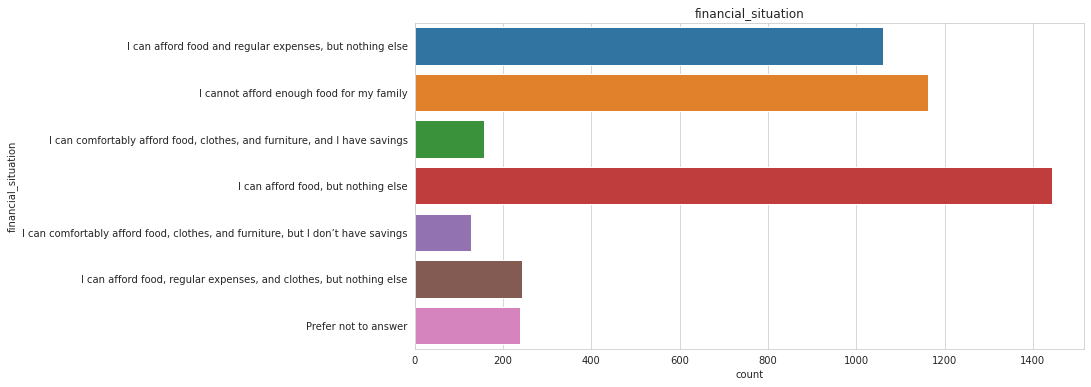

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=reduced_df, y='financial_situation')
plt.title('financial_situation')

In [23]:
def group(situation): 
    if (situation == "I can comfortably afford food, clothes, and furniture, but I don’t have savings" or situation == "I can comfortably afford food, clothes, and furniture, and I have savings"):
        return 'Good_situation'
    elif situation == 'I can afford food and regular expenses, but nothing else':
        return 'Better_situation'
    elif situation == "I can afford food, but nothing else":
        return 'Midium_situation'
    elif situation == "I cannot afford enough food for my family":
        return 'Bad_situation'
    else:
        return 'Good_situation'

In [24]:
reduced_df['financial_situation'] = reduced_df.copy()['financial_situation'].map(group)
reduced_df_part['financial_situation'] = reduced_df_part.copy()['financial_situation'].map(group)


/tmp/ipykernel_4129/4006878730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['financial_situation'] = reduced_df.copy()['financial_situation'].map(group)


Text(0.5, 1.0, 'financial_situation')

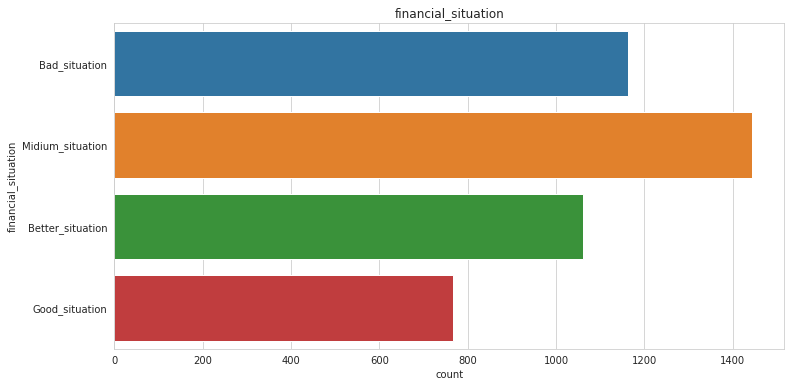

In [25]:
order = ['Bad_situation', 'Midium_situation', 'Better_situation', 'Good_situation']
plt.figure(figsize=(12, 6))
sns.countplot(data=reduced_df, y='financial_situation', order=order)
plt.title('financial_situation')

Model Build

In [26]:
# data
reduced_df
reduced_df_part

,submission_id,submission_state,education,employment_status,financial_situation,percentage,age,are_children_attending_face_to_face_classes,are_there_children_who_stopped_enrolling_in_primary_education,does_home_shows_severe_deficit_of_electricity,...,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_being_teached_by_unqualified_people,gender,does_home_shows_severe_deficit_of_internet,do_school_and_the_teachers_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_class_or_in_lower_grade
0,4570534489882624,Miranda,9,I am unemployed,Better_situation,0.88,Over 45 years old,0,1,0,...,Every day,Irregularly,0,0,Female,0,1,0,1,0
1,6440166989496320,Miranda,9,I am unemployed,Bad_situation,0.88,26 to 35 years old,0,0,0,...,No,Irregularly,0,0,Male,0,0,1,1,0
2,5001167808757760,Miranda,9,"I work full-time, either as an employee or sel...",Good_situation,0.88,26 to 35 years old,0,1,1,...,No,There are not enough,1,1,Female,0,0,0,1,0
4,5032515751641088,Miranda,9,I am unemployed,Better_situation,0.88,Over 45 years old,0,0,0,...,No,There are not enough,0,0,Female,0,0,1,1,0
6,4994446973468672,Miranda,9,"I do housework, fulfilling domestic tasks, loo...",Better_situation,0.88,26 to 35 years old,0,0,0,...,Every day,There are not enough,0,0,Female,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,4710849494384640,Anzoátegui,8,I am a student,Better_situation,0.95,16 to 25 years old,0,0,0,...,No,Irregularly,0,0,Female,1,1,1,1,0
4422,6546760175714304,Anzoátegui,9,I am unemployed,Midium_situation,0.95,16 to 25 years old,0,0,0,...,No,There are enough,0,0,Female,1,0,0,0,0
4423,5892247139909632,Anzoátegui,1,"I work full-time, either as an employee or sel...",Midium_situation,0.95,16 to 25 years old,0,1,1,...,No,There are enough,1,1,Female,1,1,0,1,1
4429,5222701550796800,Anzoátegui,7,I am a student and I work part-time,Good_situation,0.95,16 to 25 years old,0,0,0,...,3 days,Irregularly,1,0,Male,1,1,1,1,1


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [28]:
# set target
X = reduced_df.drop('do_children_3_to_17_yrs_miss_class_or_in_lower_grade', axis=1)
y = reduced_df['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']

X = pd.get_dummies(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Delineate data sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [31]:
print("Best Parameters:", grid_search.best_params_)
best_tree = grid_search.best_estimator_
print("Best Cross-validation Score:", grid_search.best_score_)
results = pd.DataFrame(grid_search.cv_results_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Score: 0.7734837799717913


/home/ubuntu/.local/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


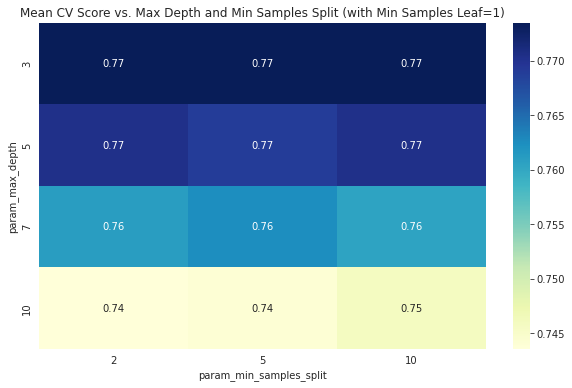

In [65]:
filtered_df = results[results['param_min_samples_leaf'] == 1]
heatmap_data = filtered_df.pivot(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title("Mean CV Score vs. Max Depth and Min Samples Split (with Min Samples Leaf=1)")
plt.show()

In [66]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_feature_importances = rf.feature_importances_

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'], 
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


In [67]:
print("Best Parameters from Grid Search:", best_params)
print("Best Cross-validation Score:", grid_search.best_score_)

Best Parameters from Grid Search: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score: 0.7923836389280676


In [68]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] 
}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)  # 增加了max_iter，确保收敛
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [69]:
print("Best Parameters from Grid Search:", best_params)
print("Best Cross-validation Score:", grid_search.best_score_)

Best Parameters from Grid Search: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Score: 0.789280677009873


In [71]:
# clustering analysis
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4) #assume we use 4 clusters
clusters = kmeans.fit_predict(X_scaled)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10)  # Explicitly set n_init to 10
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


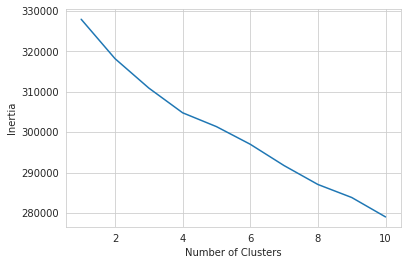

In [72]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

07-DM

In [73]:
X = reduced_df_part.drop('do_children_3_to_17_yrs_miss_class_or_in_lower_grade', axis=1)
y = reduced_df_part['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']
X = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_optimized = LogisticRegression(C=0.01, penalty='l2', solver='lbfgs', max_iter=1000)

lr_optimized.fit(X_train, y_train)
predictions = lr_optimized.predict(X_test)

#score
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.7518382352941176

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       382
           1       0.67      0.33      0.44       162

    accuracy                           0.75       544
   macro avg       0.72      0.63      0.64       544
weighted avg       0.74      0.75      0.72       544



In [74]:
# RandomForest
rf_optimized = RandomForestClassifier(
    max_depth=1,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
rf_optimized.fit(X_train, y_train)
predictions = rf_optimized.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
rf_optimized.feature_importances_

Accuracy: 0.7022058823529411

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.83       382
           1       0.00      0.00      0.00       162

    accuracy                           0.70       544
   macro avg       0.35      0.50      0.41       544
weighted avg       0.49      0.70      0.58       544



/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.01, 0.02, 0.  , 0.1 , 0.07, 0.07, 0.06, 0.04, 0.05, 0.  , 0.06,
       0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01,
       0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.01, 0.02, 0.01, 0.01,
       0.  , 0.04, 0.05, 0.02, 0.01, 0.  , 0.11, 0.  , 0.02, 0.  , 0.  ,
       0.01, 0.  , 0.06, 0.05, 0.  , 0.  ])

In [75]:
# Decision Trees
X2 = reduced_df.drop('do_children_3_to_17_yrs_miss_class_or_in_lower_grade', axis=1)
y2 = reduced_df['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']
X2 = pd.get_dummies(X2)
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.3, random_state=42)

dt_optimized = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
dt_optimized.fit(X_train2, y_train2)
predictions = dt_optimized.predict(X_test2)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test2, predictions)
report = classification_report(y_test2, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.762406015037594

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       991
           1       0.65      0.14      0.24       339

    accuracy                           0.76      1330
   macro avg       0.71      0.56      0.55      1330
weighted avg       0.74      0.76      0.70      1330



/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_3150/3736832439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['cluster'] = clusters


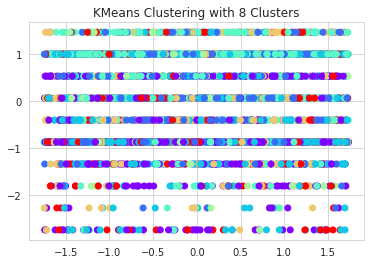

In [78]:
kmeans_optimized = KMeans(n_clusters=8, random_state=42)
clusters = kmeans_optimized.fit_predict(X_scaled2)
reduced_df['cluster'] = clusters
plt.scatter(X_scaled2[:, 0], X_scaled2[:, 1], c=clusters, cmap='rainbow')
plt.title('KMeans Clustering with 8 Clusters')
plt.show()

In [79]:
# Search for patterns

# Random Forest
X = reduced_df_part.drop('do_children_3_to_17_yrs_miss_class_or_in_lower_grade', axis=1)
y = reduced_df_part['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']
X = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
rf_optimized = RandomForestClassifier(
    max_depth=1,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
rf_optimized.fit(X_train, y_train)
predictions = rf_optimized.predict(X_test)
features = X.columns
importances = rf.feature_importances_
feature_importances = dict(zip(features, importances))
for feature, importance in sorted(feature_importances.items(), key=lambda item: item[1], reverse=True):
    print(f"{feature}: {importance}")

submission_id: 0.10088360672744409
education: 0.05801090348886446
percentage: 0.0448422849301214
are_children_attending_face_to_face_classes: 0.04387240941635421
are_there_children_who_stopped_enrolling_in_primary_education: 0.042387501980529395
does_home_shows_severe_deficit_of_electricity: 0.03815325208348896
are_children_being_teached_by_unqualified_people: 0.03234020224263593
are_there_children_who_stopped_enrolling_in_secondary_education: 0.03092647194718536
does_home_shows_severe_deficit_of_internet: 0.02581681561029695
do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity: 0.022771175917289707
do_children_have_internet_connection: 0.022591502111513572
do_school_and_the_teachers_have_internet_connection: 0.021471525113841147
geography_Rural: 0.019633497601812853
financial_situation_Good_situation: 0.01916378369378069
geography_Suburban/Peri-urban: 0.01810545812106671
are_there_teachers_at_scheduled_class_hours_There are not enough: 0.017201532924057975
age_Over 45

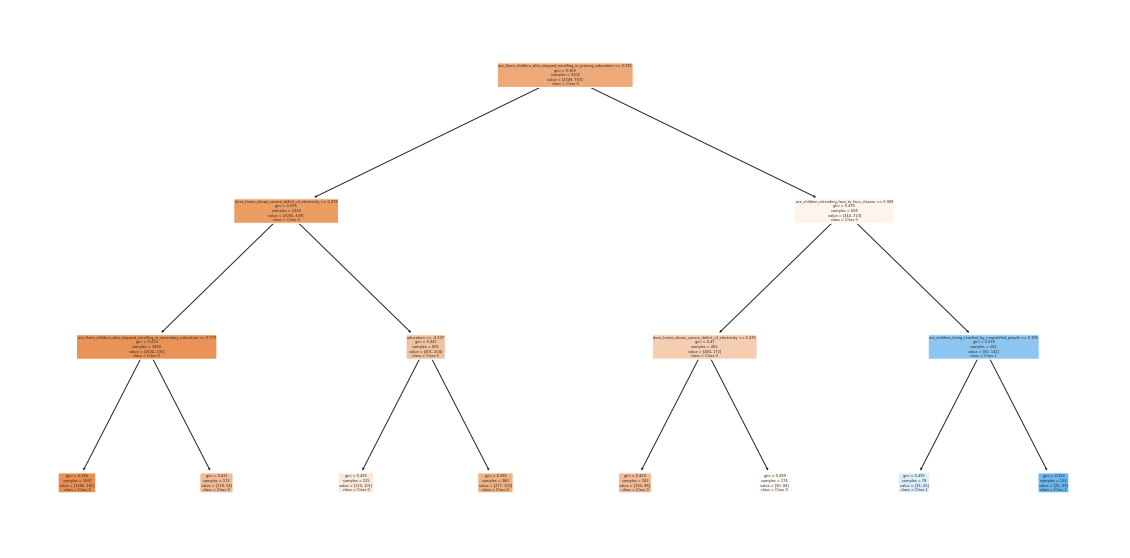

In [80]:
# Decision Tree

from sklearn.tree import plot_tree
X2 = reduced_df.drop('do_children_3_to_17_yrs_miss_class_or_in_lower_grade', axis=1)
y2 = reduced_df['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']
X2 = pd.get_dummies(X2)
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.3, random_state=42)

dt_optimized = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
dt_optimized.fit(X_train2, y_train2)
predictions = dt_optimized.predict(X_test2)
plt.figure(figsize=(20,10))
plot_tree(dt_optimized, 
          filled=True, 
          feature_names=pd.get_dummies(X2).columns, 
          class_names=['Class 0', 'Class 1'], 
          rounded=True)

plt.show()

8 Interpreation

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [93]:
# logistic regression
X = reduced_df_part.drop('do_children_3_to_17_yrs_miss_class_or_in_lower_grade', axis=1)
y = reduced_df_part['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']
X = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

lr_optimized = LogisticRegression(C=0.01, penalty='l2', solver='lbfgs', max_iter=1000)
lr_optimized.fit(X_train, y_train)
predictions = lr_optimized.predict(X_test)

In [87]:
probabilities = lr_optimized.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probabilities)
print(f"AUC: {auc:.2f}")

AUC: 0.77


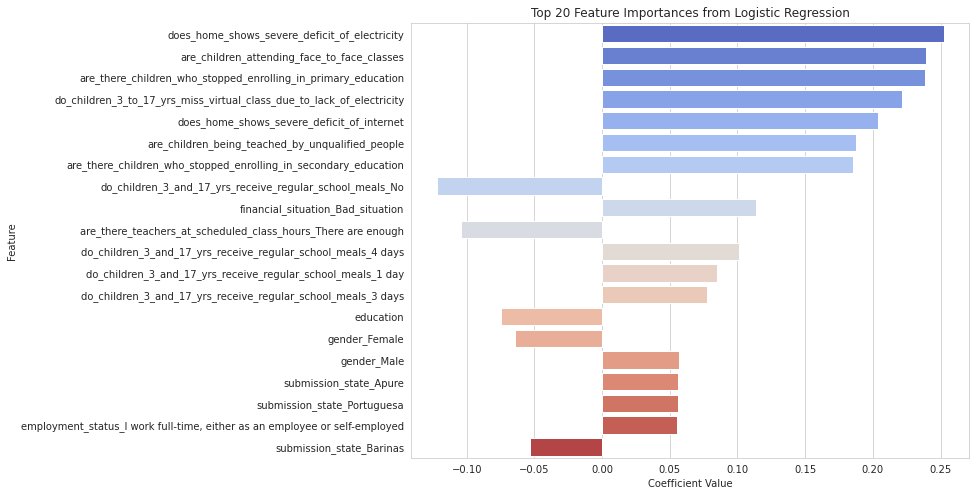

In [95]:
features = X.columns
coefficients = lr_optimized.coef_[0]
feature_importances = pd.DataFrame({"feature": features, "importance": coefficients})
feature_importances = feature_importances.sort_values(by="importance", key=lambda x: abs(x), ascending=False)
N = 20
top_features = feature_importances.head(N)
plt.figure(figsize=(10, 8))
sns.barplot(x="importance", y="feature", data=top_features, palette="coolwarm")
plt.title('Top {} Feature Importances from Logistic Regression'.format(N))
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

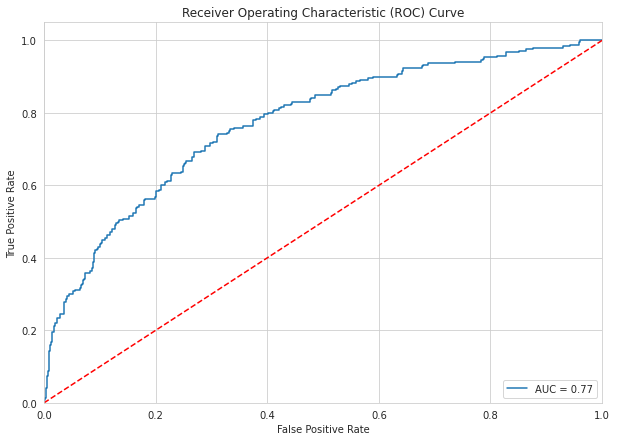

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [96]:
# random forest
rf_optimized = RandomForestClassifier(
    max_depth=1,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
rf_optimized.fit(X_train, y_train)
predictions = rf_optimized.predict(X_test)
probabilities = rf_optimized.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probabilities)
print(f"AUC: {auc:.2f}")

AUC: 0.77


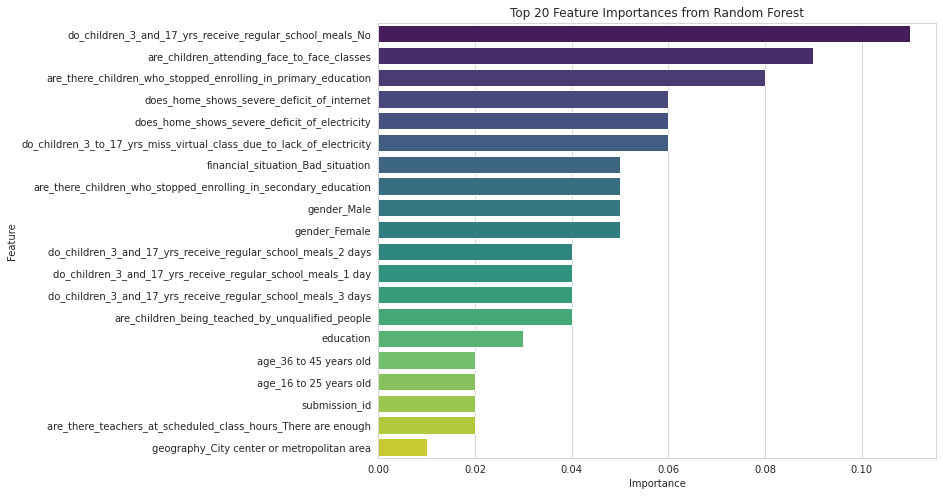

In [97]:
features = X.columns
importances = rf_optimized.feature_importances_
feature_importances = pd.DataFrame({"feature": features, "importance": importances})
feature_importances = feature_importances.sort_values(by="importance", ascending=False)
N = 20
top_features = feature_importances.head(N)
plt.figure(figsize=(10, 8))
sns.barplot(x="importance", y="feature", data=top_features, palette="viridis")
plt.title('Top {} Feature Importances from Random Forest'.format(N))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

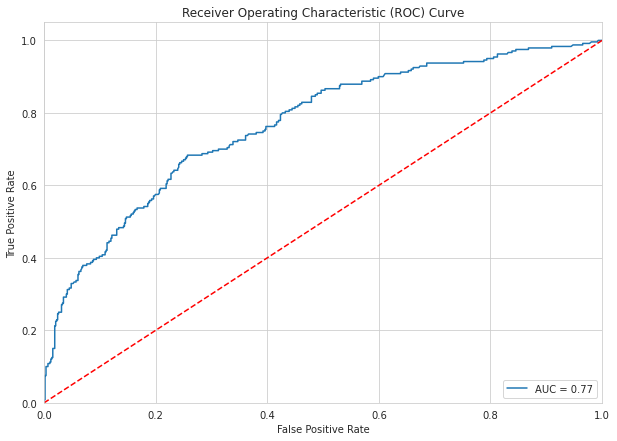

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [91]:
# decision tree
X2 = reduced_df.drop('do_children_3_to_17_yrs_miss_class_or_in_lower_grade', axis=1)
y2 = reduced_df['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']
X2 = pd.get_dummies(X2)
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.3, random_state=42)
dt_optimized = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
dt_optimized.fit(X_train2, y_train2)
predictions = dt_optimized.predict(X_test2)
probabilities = dt_optimized.predict_proba(X_test2)[:, 1]
auc = roc_auc_score(y_test2, probabilities)
print(f"AUC: {auc:.2f}")

AUC: 0.70


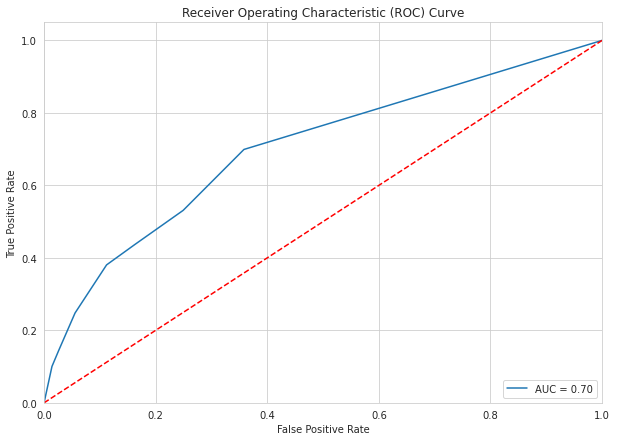

In [92]:
fpr, tpr, thresholds = roc_curve(y_test2, probabilities)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Iteration

In [32]:
#iteration
X = reduced_df_part.drop('do_children_3_to_17_yrs_miss_class_or_in_lower_grade', axis=1)
y = reduced_df_part['do_children_3_to_17_yrs_miss_class_or_in_lower_grade']
X = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


rf_optimized = RandomForestClassifier(
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
rf_optimized.fit(X_train, y_train)
predictions = rf_optimized.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.7561274509803921

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.98      0.85       576
           1       0.84      0.21      0.34       240

    accuracy                           0.76       816
   macro avg       0.79      0.60      0.59       816
weighted avg       0.78      0.76      0.70       816



In [33]:
rf_optimized = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=8,
    n_estimators=100,
    random_state=42
)
rf_optimized.fit(X_train, y_train)
predictions = rf_optimized.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.7647058823529411

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85       576
           1       0.77      0.28      0.41       240

    accuracy                           0.76       816
   macro avg       0.77      0.62      0.63       816
weighted avg       0.77      0.76      0.72       816



In [35]:
rf_optimized = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=8,
    min_samples_split=16,
    n_estimators=100,
    random_state=42
)
rf_optimized.fit(X_train, y_train)
predictions = rf_optimized.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.7647058823529411

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85       576
           1       0.77      0.28      0.41       240

    accuracy                           0.76       816
   macro avg       0.77      0.62      0.63       816
weighted avg       0.77      0.76      0.72       816

